In [2]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import shap

model = RandomForestRegressor(max_depth=85, min_samples_leaf=1, min_samples_split=2, n_estimators=1000)
scaler = StandardScaler()
# pipeline = Pipeline(steps=[('normalize', scaler), ('model', model)])

In [3]:
df = pd.read_csv("../test_data/new leaky wave/S11_Data_combined.csv").sample(5000)
input_x = df.drop(columns=['dB(S(1,1)) []'], axis=1)
# input_x.rename(columns={'inset_dist [mm]': 'inset_dist', 'L [mm]': 'L', 'sub_thick [mm]': 'sub_thick', 'W [mm]': 'W', 'W0 [mm]': 'W0', 'y0 [mm]': 'y0', 'Freq [GHz]': 'Freq'}, inplace=True)
input_y = df[['dB(S(1,1)) []']]

In [4]:
x_scaled = scaler.fit_transform(input_x)

In [5]:
model = model.fit(x_scaled, input_y.values.ravel())

In [6]:
explainer = shap.Explainer(model, x_scaled)

In [7]:
shap_values = explainer(x_scaled,check_additivity=False)

100%|===================| 4999/5000 [23:06<00:00]        

In [8]:
shap_values.feature_names = input_x.columns

In [9]:
x_scaled

array([[-9.78419720e-04, -7.41563212e-03, -4.57344475e-01, ...,
         1.27501269e+00, -2.14390474e+00, -1.63474435e+00],
       [-9.78419720e-04, -7.41563212e-03, -4.57344475e-01, ...,
         2.53740150e+00,  2.56001578e-02,  1.33954448e+00],
       [-9.78419720e-04, -7.41563212e-03, -4.57344475e-01, ...,
         1.26238881e-02, -2.14390474e+00,  4.50676550e-01],
       ...,
       [-9.78419720e-04, -7.41563212e-03, -4.57344475e-01, ...,
         2.53740150e+00,  2.56001578e-02, -1.49799544e+00],
       [-9.79398139e-01, -1.95889777e+00, -1.32781359e+00, ...,
         1.26238881e-02,  2.56001578e-02,  1.57885507e+00],
       [-9.78419720e-04, -7.41563212e-03, -4.57344475e-01, ...,
         1.26238881e-02,  2.56001578e-02,  6.24258781e-03]])

In [10]:
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/linear_models/Explaining%20a%20model%20that%20uses%20standardized%20features.html
shap_values.data = input_x.values

In [11]:
shap_values

.values =
array([[-2.68381294e-01, -2.83655886e-01,  3.30752813e-01, ...,
         2.28186422e-01, -9.58277483e-03,  7.82444779e+00],
       [-4.96450000e-01, -4.25963103e-01, -1.96843592e-01, ...,
         2.58101221e+00, -2.98164763e-02,  2.85697812e+00],
       [-7.64593245e-01, -3.68164402e-01, -1.24196473e-01, ...,
         6.05223245e-02, -1.01873141e-01, -3.93872096e+00],
       ...,
       [-2.03853943e-01, -1.62480669e-01,  6.09037298e-01, ...,
         5.15031147e-01, -1.00893121e-02,  6.56805387e+00],
       [-1.59745832e+00,  1.06126203e+00,  7.61243202e-02, ...,
         1.19133315e-02, -7.27937189e-03,  3.84391464e+00],
       [-1.53816921e+00, -1.05931931e+00, -2.56535246e-01, ...,
        -1.14512771e-01, -6.47057779e-02, -7.29816693e+00]])

.base_values =
array([-10.07382637, -10.07382637, -10.07382637, ..., -10.07382637,
       -10.07382637, -10.07382637])

.data =
array([[ 2.  ,  3.75,  3.5 , ...,  1.25,  4.5 , 11.18],
       [ 2.  ,  3.75,  3.5 , ...,  1.5 ,  4.75, 

In [12]:
# import pickle
# with open('shap_values.pkl', 'wb') as f:
#     pickle.dump(shap_values, f)

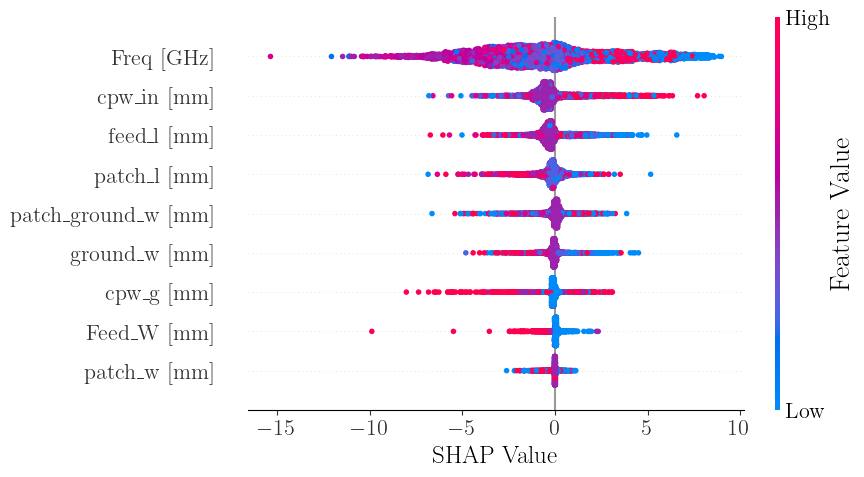

In [18]:
# https://github.com/shap/shap/issues/594#issuecomment-1206481300
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
shap.plots.beeswarm(shap_values, show=False)
fig = plt.gcf()
ax = plt.gca()
ax.tick_params(labelsize=16)
ax.set_xlabel("SHAP Value", fontsize=18)
cb_ax = fig.axes[1]
cb_ax.tick_params(labelsize=16)
cb_ax.set_ylabel("Feature Value", fontsize=20)
plt.savefig("shap_beeswarm.svg", bbox_inches='tight', format="svg")
plt.show()

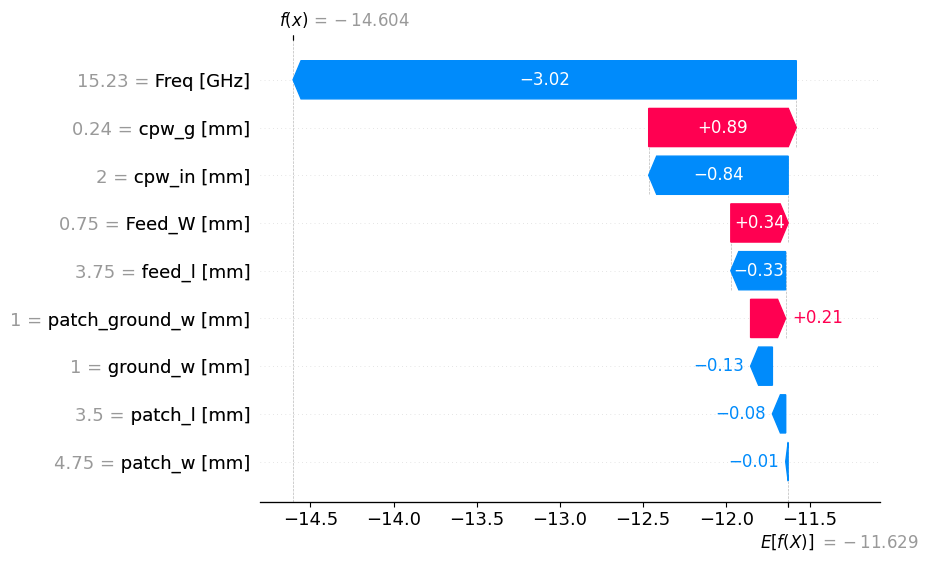

In [ ]:

shap.plots.waterfall(shap_values[300])